### Telepítés és detektálás egy lépésben




 

Mounted at /content/drive
--2020-11-23 19:16:14--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2020-11-23 19:16:14--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   240MB/s    in 2.3s    

2020-11-23 19:16:16 (240 MB/s) - ‘Anaconda3

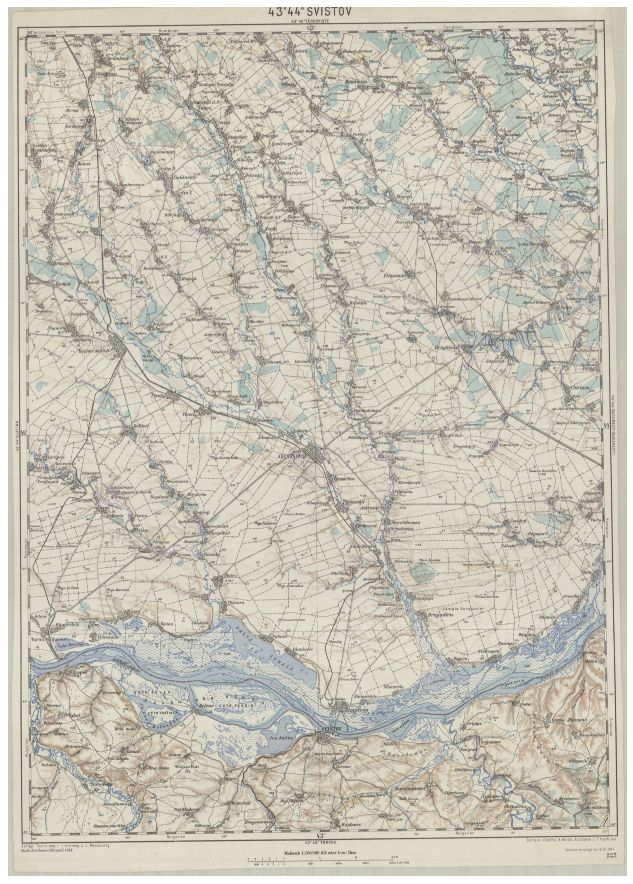

(736, 976, 3)
Processing 1 images
image                    shape: (736, 976, 3)         min:   43.00000  max:  241.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[395 164 448 198]
 [183 342 218 370]]


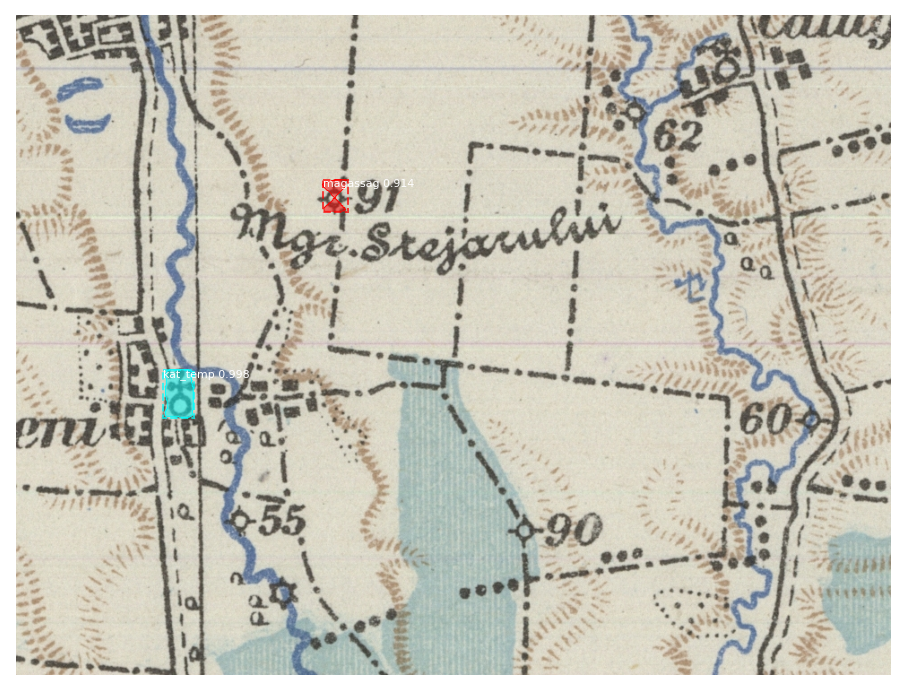

(1138, 1401, 3)
Processing 1 images
image                    shape: (1138, 1401, 3)       min:   44.00000  max:  242.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1401.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[690 468 744 501]
 [332 296 408 350]
 [261 139 316 171]]


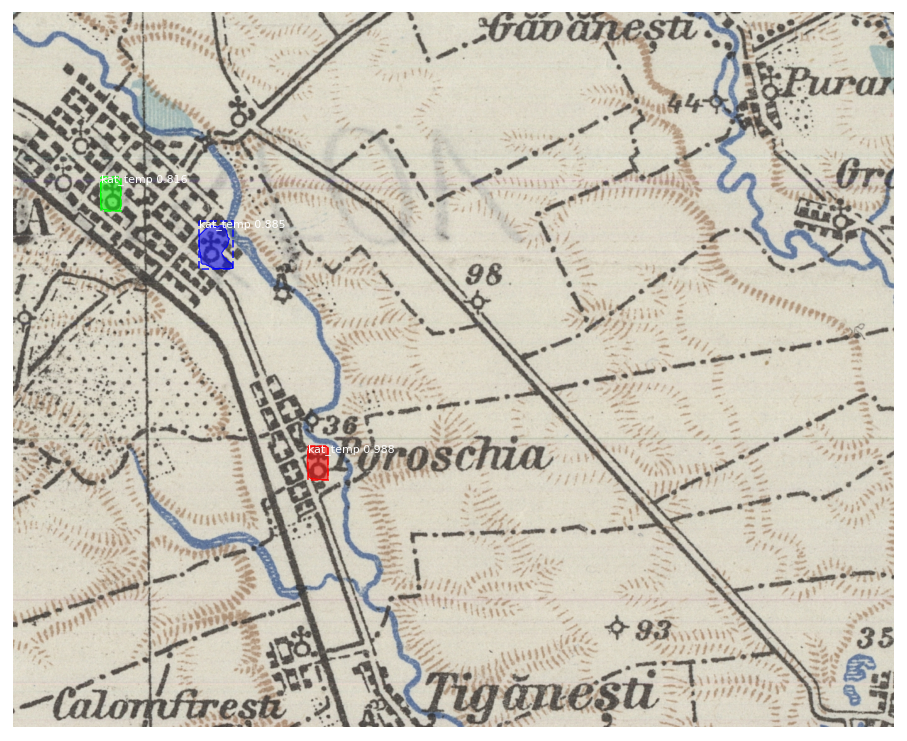

(2000, 2000, 3)
Processing 1 images
image                    shape: (2000, 2000, 3)       min:   44.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:  -77.70000  max:  138.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 2000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[]

*** No instances to display *** 



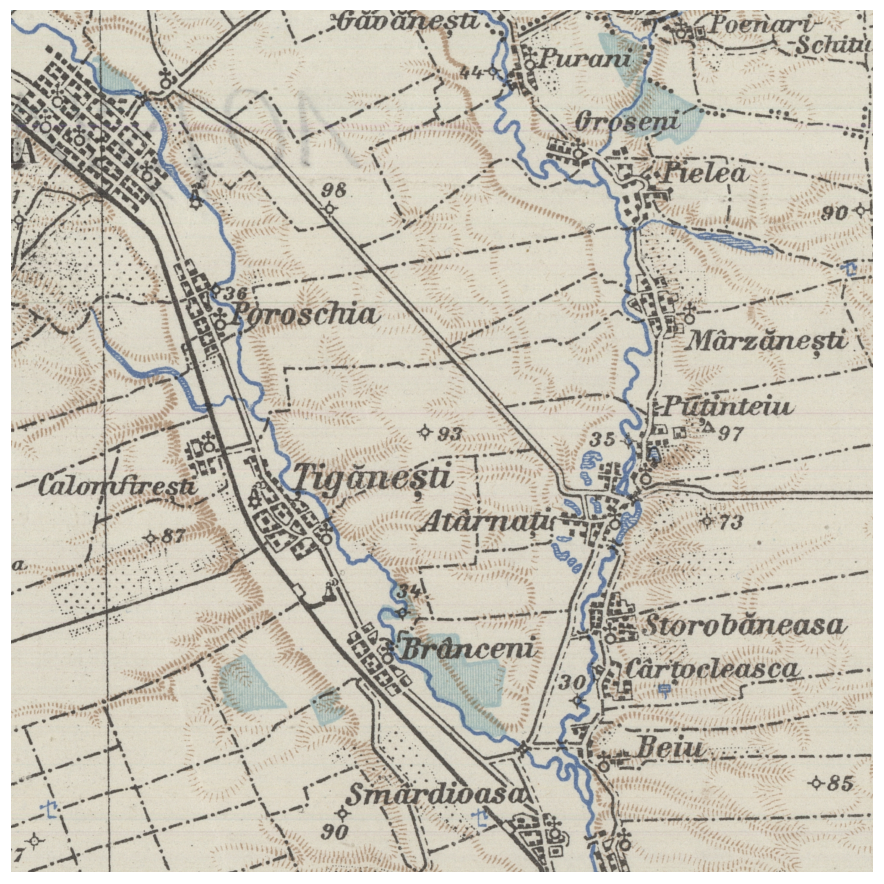


 131.807577 masodperc futasido
2.183333333333333 perc


In [ ]:
import time
start_time = time.clock()


#drive kapcsolat
from google.colab import drive
drive.mount('/content/drive')

#telepites
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

!conda create -n myenv python=3.6.4 -y
!source activate myenv

!conda install numpy scipy Pillow cython matplotlib scikit-image opencv h5py IPython[all] tensorboard python==3.6.4 tensorflow==2.0 tensorflow-gpu==2.0 -y

!rm -r /content/custom_mrcnn
!git clone https://github.com/valentin356/custom_mrcnn.git

#ez megmókolja a modult

!rm -r /usr/local/envs/myenv/lib/python3.6/site-packages/mrcnn
!rm -r /usr/local/lib/python3.6/dist-packages/mrcnn

!cp -r /content/custom_mrcnn/mrcnn /usr/local/envs/myenv/lib/python3.6/site-packages
!cp -r /content/custom_mrcnn/mrcnn /usr/local/lib/python3.6/dist-packages
!rm -r /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py
!cp -r /content/custom_mrcnn/core.py /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py
!cp -r /content/custom_mrcnn/mrcnn/visualize.py /usr/local/envs/myenv/lib/python3.6/site-packages/visualize.py


#innentől detektálás

import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import json
import datetime
import tensorflow.compat.v1 as tf
import skimage.draw
import cv2
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn import model as modellib, utils
import glob
import csv


class CustomConfig(Config):
    # Give the configuration a recognizable name
    NAME = 'negyjel'

    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # Background + toy

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 1500

    # Skip detections with < 80% confidence
    DETECTION_MIN_CONFIDENCE = 0.8



# Root directory of the project
ROOT_DIR = "/content/drive/My Drive/SAJAT/"

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library


#%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "negyjel_modell")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(MODEL_DIR, "negyjel20201120T0131/mask_rcnn_negyjel_0004.h5")

#driverol
IMAGE_DIR = "/content/drive/My Drive/SAJAT/nagyteszt"

config = CustomConfig()

config.display()
print(IMAGE_DIR)

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)



class_names = ["background", "kat_temp", "ort_temp", "malom", "magassag"] 
kozepe=["malom", "magassag"]  #pont koordinatakkal a jel kozeppontjat menti ki

for kep in glob.glob(os.path.join(IMAGE_DIR, "*.jpg")):

    image = cv2.imread(kep)
    
    print (image.shape)

    # Run detection
    results = model.detect([image], verbose=1)
    # Visualize results
    r = results[0]
    print (r['rois'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #rgb-vé alakaítás
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'])
    
    detektalt_nev=kep[:-4]+"det.png"
    #visualize.save_image(image, r['rois'], r['masks'], r['class_ids'], 
     #                           class_names, detektalt_nev, r['scores']) #megjeleníti és elmenti
    

    
    # Koordináták exportálása

    csvbe_nev=kep[:-4]+".csv"
    csvbe=open (csvbe_nev, mode='w', newline='')
    writer=csv.writer(csvbe)
    
    for i in range(len(r['rois'])):
        osztaly=class_names[r['class_ids'][i]]                 #osztaly neve
        if osztaly in kozepe:
          ujy=int((r['rois'][i][0]+r['rois'][i][2])/2)
        else:
          ujy=int((r['rois'][i][0]+3*r['rois'][i][2])/4)       #kozeppont y es x koordinatai
        ujx=int((r['rois'][i][1]+r['rois'][i][3])/2)          
        score=r['scores'][i]                                   #bizonyossag
        writer.writerow([ujy, ujx, osztaly, score])
    


print ("\n", time.clock() - start_time, "masodperc futasido") 
if time.clock() - start_time >=60:
    print (str(math.floor(time.clock() - start_time)/60) + " perc")






## Modell készítés driveról drivera




In [ ]:
import time
start_time = time.clock()


import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import json
import datetime
import tensorflow.compat.v1 as tf
import skimage.draw
import cv2
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn import model as modellib, utils
import glob




#!git clone https://github.com/valentin356/AHSDatasets.git

!cp -r "/content/drive/My Drive/dataset" /content/dataset/
#If pretrained modell is within dataset dir.
#pretrained.h5 fajl helye
!rm -r "/content/dataset/dataset"
!rm -r "/content/dataset/logs"
!rm -r "/content/dataset/train"
!rm -r "/content/dataset/val"

!cp -r "/content/drive/My Drive/SAJAT/negyjel_dataset/train" /content/dataset/train/  #ezt írd át
!cp -r "/content/drive/My Drive/SAJAT/negyjel_dataset/val" /content/dataset/val/      #és ezt is



ROOT_DIR = os.path.abspath("/content/dataset")

sys.path.append(ROOT_DIR)
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "pretrained.h5")
#DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")   #ezt átírtam
DEFAULT_LOGS_DIR = "/content/drive/My Drive/SAJAT/negyjel_modell"
train_dir = "/content/dataset/train"
val_dir = "/content/dataset/val"

class CustomConfig(Config):
    # Give the configuration a recognizable name
    NAME = 'negyjel'

    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # Background + toy

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 1500

    # Skip detections with < 80% confidence
    DETECTION_MIN_CONFIDENCE = 0.8


class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the bottle dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have 4 classes to add.
        self.add_class("object", 1, "kat_temp")
        self.add_class('object', 2, 'ort_temp')
        self.add_class('object', 3, 'malom')
        self.add_class('object', 4, 'magassag')

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations1 = json.load(open(os.path.join(dataset_dir, "ann.json"),"r"))
        # print(annotations1)
        annotations = list(annotations1.values())  # don't need the dict keys

        
        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]
        '''
        # Add images
        for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions'].values()]

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "lake",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons)
        '''   

        for a in annotations:
            polygons = [r['shape_attributes'] for r in a['regions'].values()]
            objects = [s['region_attributes']['label'] for s in a['regions'].values()]
            print("objects:",objects)
            name_dict = {"kat_temp": 1,"ort_temp": 2,"malom": 3,"magassag": 4}
            num_ids = [name_dict[a] for a in objects]

            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]


            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids)






    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a bottle dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        #return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask.astype(np.bool), num_ids

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)


def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = CustomDataset()
    dataset_train.load_custom("dataset", "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CustomDataset()
    dataset_val.load_custom("dataset", "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network all")#heads
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=4,
                layers='all')



config = CustomConfig()
config.display()

model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)

COCO_WEIGHTS_PATH = "/content/dataset/pretrained.h5"
weights_path = COCO_WEIGHTS_PATH

model.load_weights(weights_path, by_name=True, exclude=[
        "mrcnn_class_logits", "mrcnn_bbox_fc",
        "mrcnn_bbox", "mrcnn_mask"])
train(model)

print ("\n", time.clock() - start_time, "masodperc futasido") 
if time.clock() - start_time >=60:
    print (str(math.floor(time.clock() - start_time)/60) + " perc")



rm: cannot remove '/content/dataset/dataset': No such file or directory

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcn

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1500/1500 [==============================] - ETA: 0s - batch: 749.5000 - size: 1.0000 - loss: 0.7187 - rpn_class_loss: 0.0076 - rpn_bbox_loss: 0.1655 - mrcnn_class_loss: 0.1079 - mrcnn_bbox_loss: 0.1427 - mrcnn_mask_loss: 0.2951WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1500/1500 [==============================] - 1330s 886ms/step - batch: 749.5000 - size: 1.0000 - loss: 0.7187 - rpn_class_loss: 0.0076 - rpn_bbox_loss: 0.1655 - mrcnn_class_loss: 0.1079 - mrcnn_bbox_loss: 0.1427 - mrcnn_mask_loss: 0.2951 - val_loss: 0.5052 - val_rpn_class_loss: 0.0040 - val_rpn_bbox_loss: 0.1340 - val_mrcnn_class_loss: 0.0502 - val_mrcnn_bbox_loss: 0.0845 - val_mrcnn_mask_loss: 0.2324
Epoch 2/4
150